In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [5]:
df = pd.read_csv("./cell_samples.csv")
print(df.shape)
df.head()

(699, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

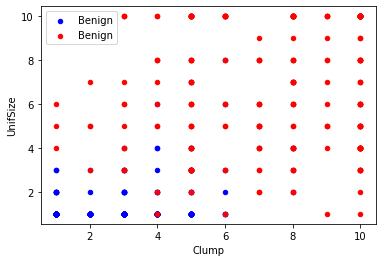

In [17]:
axes = df[df['Class']==2][0:240].plot(kind='scatter', x= 'Clump', y = 'UnifSize', color='blue', label='Benign')
df[df['Class']==4][0:240].plot(kind='scatter', x= 'Clump', y = 'UnifSize', color='red', label='Benign', ax=axes )

In [27]:
df.dtypes, df.BareNuc.value_counts()

(ID              int64
 Clump           int64
 UnifSize        int64
 UnifShape       int64
 MargAdh         int64
 SingEpiSize     int64
 BareNuc        object
 BlandChrom      int64
 NormNucl        int64
 Mit             int64
 Class           int64
 dtype: object,
 1     402
 10    132
 5      30
 2      30
 3      28
 8      21
 4      19
 ?      16
 9       9
 7       8
 6       4
 Name: BareNuc, dtype: int64)

In [30]:
df1 = df[df['BareNuc']!= '?'].astype('int')
df1

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [32]:
df1.dtypes, df1.BareNuc.value_counts()

(ID             int32
 Clump          int32
 UnifSize       int32
 UnifShape      int32
 MargAdh        int32
 SingEpiSize    int32
 BareNuc        int32
 BlandChrom     int32
 NormNucl       int32
 Mit            int32
 Class          int32
 dtype: object,
 1     402
 10    132
 5      30
 2      30
 3      28
 8      21
 4      19
 9       9
 7       8
 6       4
 Name: BareNuc, dtype: int64)

In [41]:
X = df1.drop(['ID', 'Class'], axis=1)
Y = df1['Class']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((546, 9), (546,), (137, 9), (137,))

In [86]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

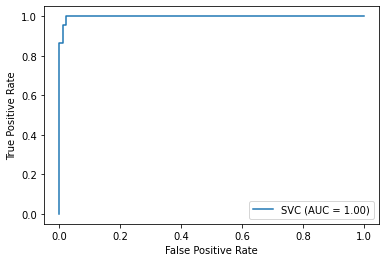

In [93]:
prd = classifier.predict(x_test)
plot_roc_curve(classifier, x_test, y_test)

In [89]:
classifier.score(x_test, y_test)

0.9781021897810219

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [83]:
logisticRegr.predict(x_test)

array([4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 2])

In [84]:
logisticRegr.score(x_test, y_test)

0.9708029197080292